In [1]:
import random
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap, Normalize
import igraph as ig

import networkx as nx
import pandas as pd
import numpy as np
import os
import math
import re
from collections import Counter
import scipy.stats
import seaborn as sns
from matplotlib.font_manager import FontProperties  # 导入FontProperties
import warnings
warnings.filterwarnings("ignore")

In [2]:
fLauCounter = pd.read_csv(r"E:\netData\MAG-nobel\2 Nobel laureates counterparts\counterparts.zip")

In [3]:
fLau = pd.read_csv(r"E:\netData\MAG-nobel\361 Nobel laureates.csv")

In [4]:
fLau

,Laureate name,max cit,pub num,total cit,h,g,max2,max3,max4,max5,affiliation,Prize year,field,Is paired,hitcitnum
0,"akasaki, isamu",1708,653,23875,74,138,1607.0,1392.333333,1192.00,1067.6,meijo university,2014,Physics,1.0,867.0
1,albert a. michelson,940,64,2295,20,47,538.0,403.333333,333.00,284.2,university of chicago,1907,Physics,1.0,65.0
2,"alferov, zi",652,297,11018,53,100,587.5,550.666667,518.75,488.8,russian academy of sciences,2000,Physics,1.0,189.0
3,"alfven, h",879,65,3246,25,56,574.5,454.333333,390.00,348.0,0,1970,Physics,1.0,67.0
4,"alvarez, lw",282,28,1124,14,28,225.0,188.333333,167.50,151.4,university of chicago,1968,Physics,1.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,"wald, g",831,102,9914,56,99,680.5,624.000000,576.75,539.0,0,1967,Medicine,1.0,584.0
357,"watson, jd",9270,91,20359,42,91,5240.0,3755.000000,2998.25,2528.2,cold spring harbor laboratory,1962,Medicine,1.0,778.0
358,"yalow, rs",840,211,13393,57,111,759.5,690.000000,649.00,604.8,united states department of veterans affairs,1977,Medicine,1.0,647.0
359,"yamanaka, s",19076,248,80108,100,248,17151.0,12664.333330,10189.00,8626.2,kyoto university,2012,Medicine,1.0,3769.0


# Analysis

In [6]:
d1 = fLau['h']
d2 = fLauCounter['h']
dd = [ d1,d2]
d = [np.mean(d1),np.mean(d2)]
std = [np.std(d1)*len(d1)**-0.5,np.std(d2)*len(d2)**-0.5]

In [7]:
y_pos = [1,2,]

Text(0, 0.5, 'h-index')

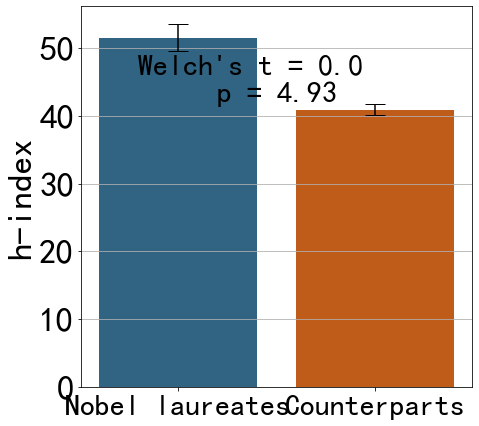

In [9]:
f, ax = plt.subplots(figsize=(7, 7))
plt.bar(y_pos, d, yerr=std,align='center', color= ['#1A5276','#BA4A00'],alpha=0.9,capsize=10)
t,p = scipy.stats.ttest_ind(d1.dropna() , d2.dropna(), equal_var=False, alternative='two-sided')
plt.text(0.8,46,"Welch's t = {}".format(np.around (p, 3 )),fontsize = 30)
plt.text(1.2,42,"p = {}".format(np.around (t, 2 )),fontsize = 30)

ax.yaxis.grid(True)
plt.xticks(y_pos,['Nobel laureates','Counterparts'],fontsize = 30)
plt.yticks([0,10,20,30,40,50],size = 35)
plt.ylabel(r'h-index',fontsize = 35)

In [12]:
columnlst = ['pub num','total cit', 'h', 'g','hitcitnum']
labellst = ['pub num','total cit', 'h-index', 'g-index','Apex index']

ytic1 = [460,400000,73,136,4600]
ytic2 = [420,160000,67,125,4200]

In [14]:
plt.rcParams['font.sans-serif'] = ['Arial']

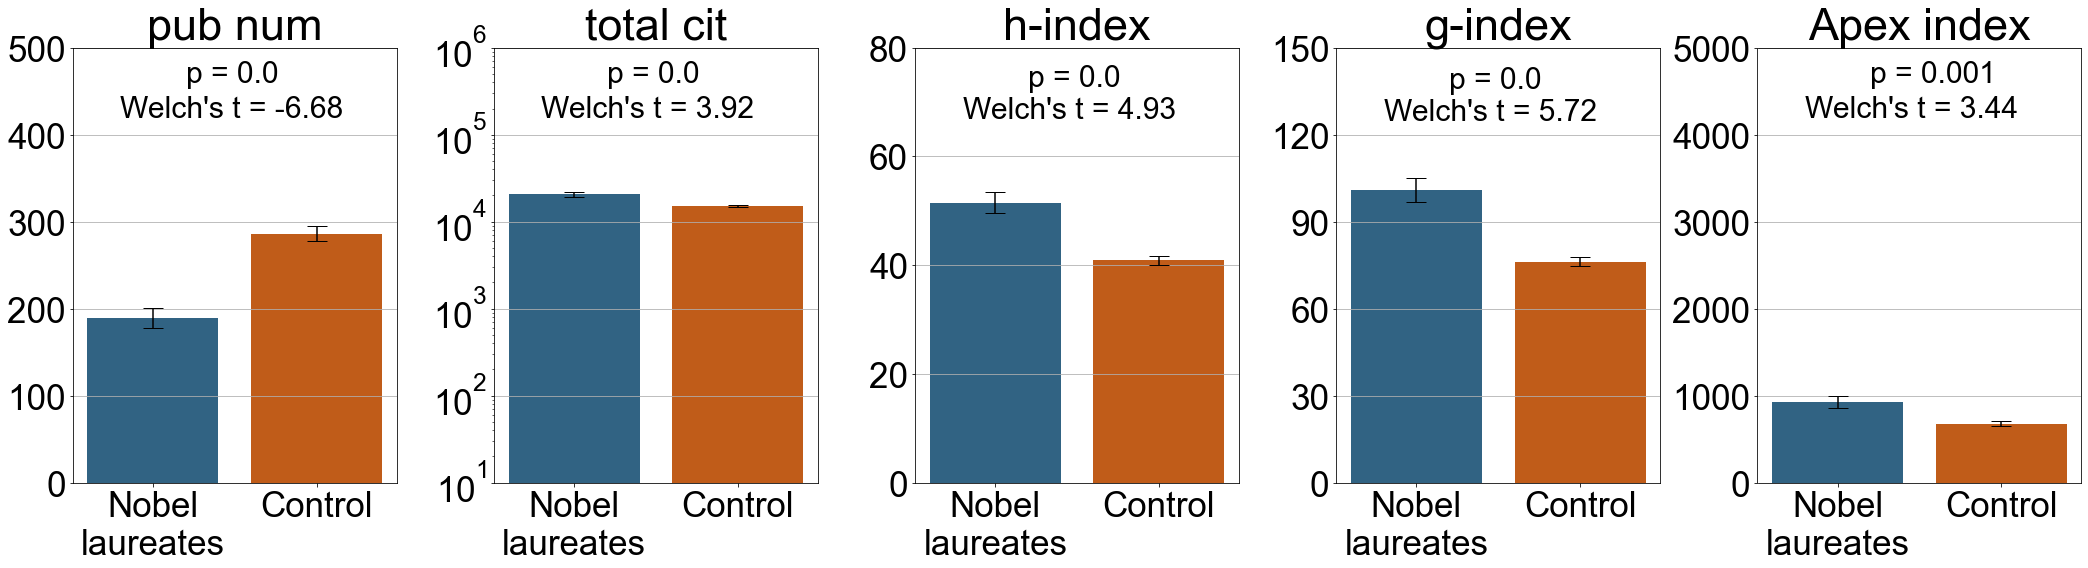

In [16]:
plt.subplots(1,5,figsize=(36,8))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.3,hspace=0.15)

for i in range(len(columnlst)):
    column = columnlst[i]
    d1 =    fLau[column]
    d2 =    fLauCounter[column]
    dd = [ d1,d2]
    d = [np.mean(d1),np.mean(d2)]
    std = [np.std(d1)*len(d1)**-0.5,np.std(d2)*len(d2)**-0.5]
    
    ax = plt.subplot(1,5,i+1)
    plt.bar(y_pos, d, yerr=std,align='center', color= ['#1A5276','#BA4A00'],alpha=0.9,capsize=10)
    ax.yaxis.grid(True)

    t,p = scipy.stats.ttest_ind(d1.dropna() , d2.dropna(), equal_var=False, alternative='two-sided')
    plt.text(0.8,ytic2[i],"Welch's t = {}".format(np.around (t, 2 )),fontsize = 30)
    plt.text(1.2,ytic1[i],"p = {}".format(np.around (p, 3 )),fontsize = 30)

    if i==0:
        plt.yticks([0,100,200,300,400,500],size = 35)
    elif i==1:
        ax.set_yscale("log")
        plt.yticks([10e0,10e1,10e2,10e3,10e4,10e5],size = 35)
    elif i==2:
        plt.yticks([0,20,40,60,80],size = 35)
    elif i==3:
        plt.yticks([0,30,60,90,120,150],size = 35)
    else:
        plt.yticks([0,1000,2000,3000,4000,5000],size = 35)

    plt.xticks(y_pos,['Nobel\nlaureates','Control'],fontsize = 35)
    plt.yticks(size = 35)
    plt.title(labellst[i] , size = 45)

plt.savefig(r"F:\A J YANG PAPER\Nobel analysis\STI apex index\figs\fig 4\2.pdf",bbox_inches = 'tight')